In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
%matplotlib inline

## Loading the Boston Housing Pricing Dataset


In [2]:
dataset =pd.read_csv('Boston.csv' )


In [3]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Summarizing the stats of the data

In [4]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Check the missing values

In [5]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
BLACK      0
LSTAT      0
PRICE      0
dtype: int64

## Exploratory Data Analysis

## 1. Correlation check between the features

In [6]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## Note : If 2 or more independent features are highly correlated, remove one of the features to eliminate multicollinearity 

In [7]:
sns.pairplot(dataset)

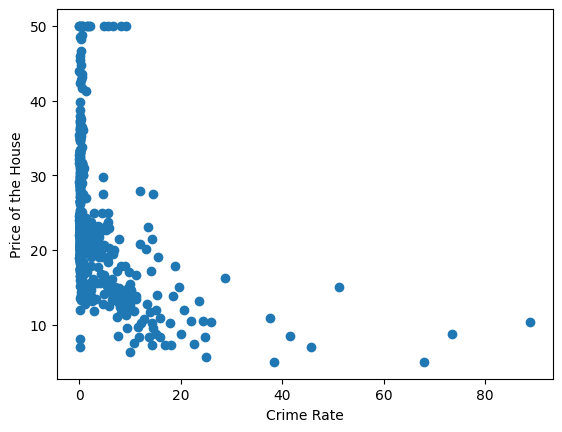

In [ ]:
plt.scatter(dataset['CRIM'], dataset['PRICE'])
plt.xlabel('Crime Rate')
plt.ylabel('Price of the House')
plt.show()

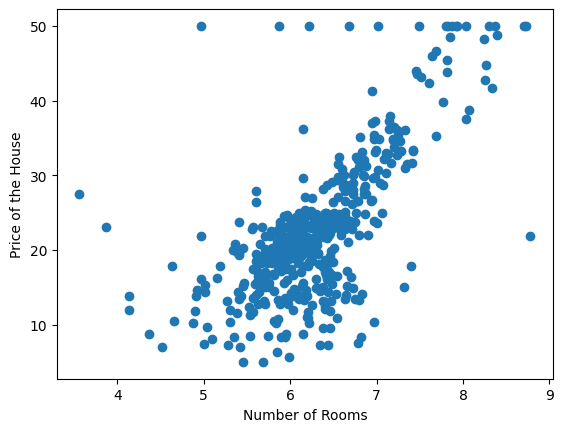

In [ ]:
plt.scatter(dataset['RM'], dataset['PRICE'])
plt.xlabel('Number of Rooms')
plt.ylabel('Price of the House')
plt.show()

## Independent and Dependent Features

In [ ]:
x= dataset.iloc[:,:-1]
y= dataset.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(x,y, test_size=0.3, random_state=45)
 

In [ ]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT
191,0.06911,45.0,3.44,0,0.437,6.739,30.8,6.4798,5,398,15.2,389.71,4.69
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
275,0.09604,40.0,6.41,0,0.447,6.854,42.8,4.2673,4,254,17.6,396.90,2.98
386,24.39380,0.0,18.10,0,0.700,4.652,100.0,1.4672,24,666,20.2,396.90,28.28
146,2.15505,0.0,19.58,0,0.871,5.628,100.0,1.5166,5,403,14.7,169.27,16.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,1.38799,0.0,8.14,0,0.538,5.950,82.0,3.9900,4,307,21.0,232.60,27.71
380,88.97620,0.0,18.10,0,0.671,6.968,91.9,1.4165,24,666,20.2,396.90,17.21
131,1.19294,0.0,21.89,0,0.624,6.326,97.7,2.2710,4,437,21.2,396.90,12.26
414,45.74610,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666,20.2,88.27,36.98


In [ ]:
## Standardizing the dataset
## Internally the model uses gradient decsent, the main aim is reach to reach the global minima. 
## To come to global minima all the independent features units must be in scale, so the convergence occur quickly
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler. transform(X_test)

In [ ]:
X_test

array([[-0.37194359, -0.49952957, -0.61570205, ..., -0.22144399,
         0.42586987,  2.58164888],
       [-0.39694754,  0.2435574 , -1.43613799, ...,  0.10674872,
         0.38296051, -0.64495769],
       [ 0.09674914, -0.49952957,  1.04445675, ...,  0.85690346,
         0.1653655 , -0.13318046],
       ...,
       [-0.38074021, -0.49952957, -0.61570205, ..., -0.22144399,
         0.42586987, -0.33874195],
       [ 0.20590295, -0.49952957,  1.04445675, ...,  0.85690346,
         0.17298602, -1.25738916],
       [ 3.61913132, -0.49952957,  1.04445675, ...,  0.85690346,
        -4.00669051,  0.27227186]])

In [ ]:


X_test

In [ ]:
X_train

array([[-0.3916557 ,  1.41126551, -1.13051448, ..., -1.48733012,
         0.34157525, -1.12129328],
       [-0.3955755 , -0.49952957, -1.31744925, ...,  0.15363339,
         0.39925669, -1.36938473],
       [-0.38878253,  1.19895494, -0.68988251, ..., -0.362098  ,
         0.42586987, -1.36371407],
       ...,
       [-0.27175391, -0.49952957,  1.60674468, ...,  1.32575018,
         0.42586987, -0.04812053],
       [ 4.48163725, -0.49952957,  1.04445675, ...,  0.85690346,
        -3.19246781,  3.45634847],
       [ 0.32658998, -0.49952957,  1.04445675, ...,  0.85690346,
         0.42586987,  0.29778984]])

## Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression

linear=LinearRegression()


In [ ]:
linear.fit(X_train,y_train)

LinearRegression()

In [ ]:
## print the coefficents
print(linear.coef_)

[-1.04403403  1.05401899 -0.30446435  0.48167968 -1.91387665  2.54055249
  0.2062508  -3.1860519   2.9081093  -2.41218412 -1.98931455  0.76556975
 -3.54615085]


In [ ]:
## print the intercept
print(linear.intercept_)

22.492090395480226


In [ ]:
## On which parameters the model has been trained
linear.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

## Predicting the Test Data

In [ ]:
linear_pred = linear.predict(X_test)

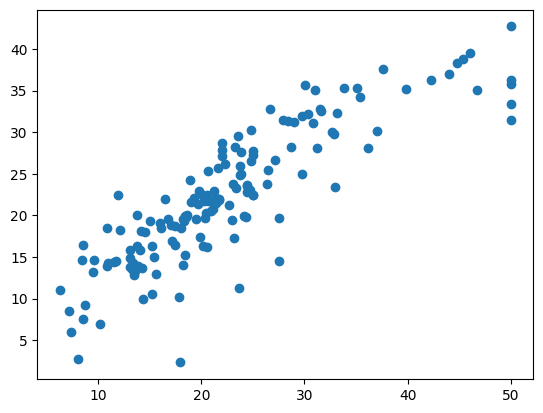

In [ ]:
## plot a scatter plot for the prediction
plt.scatter(y_test, linear_pred)

<Axes: xlabel='PRICE'>

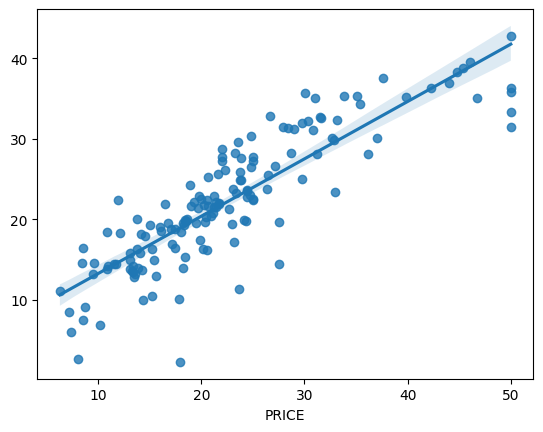

In [ ]:
sns.regplot(x=y_test, y=linear_pred)

In [ ]:
## calculating the residuals(errors)

residuals=y_test-linear_pred

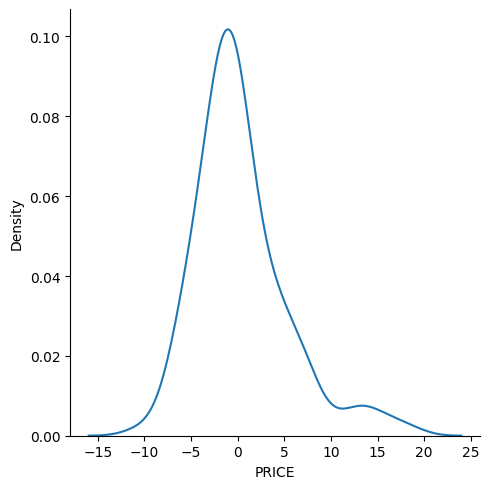

In [ ]:
##Plotting this residuals
sns.displot(residuals, kind='kde')

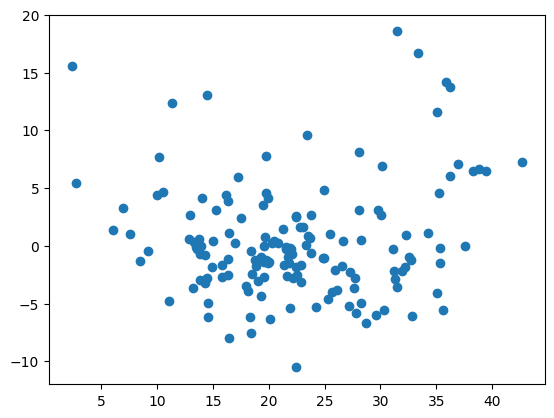

In [ ]:
#Scatter plot with respect to prediction and residuals
plt.scatter(linear_pred, residuals)

## Evalualtion Metrics

## R_Square = 1- SSR/SST

## SSR = Sum of squares of residuals
## SST = Total sum of squares

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_absolute_error(y_test,linear_pred))
print(np.sqrt(mean_squared_error(y_test,linear_pred)))

3.5312452092105473
4.945814848024476


In [ ]:
from sklearn.metrics import r2_score

score = r2_score(y_test,linear_pred)
print(score)

Adjusted_r2_score =  1-(1-score)* (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(Adjusted_r2_score )


0.7467438556481061
0.7228863927743769


## Pickling the Model File for Deployment

In [ ]:
import pickle
pickle.dump(linear, open('regmodel.pkl','wb'))

In [ ]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))